In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import pickle


df = pd.read_csv('data_train_encode.csv')

In [4]:
df

,Cost,Purchases,Importance,Discount,Weight (gram),Late,Shipment_Flight,Shipment_Road,Shipment_Ship,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Reorder_purchases
0,177,3,0,44,1233,1,1,0,0,0,0,0,1,0,1
1,216,2,0,59,3088,1,1,0,0,0,0,0,0,1,0
2,183,4,0,48,3374,1,1,0,0,1,0,0,0,0,1
3,176,4,1,10,1177,1,1,0,0,0,1,0,0,0,1
4,184,3,1,46,2484,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10637,252,5,1,1,1538,1,0,0,1,1,0,0,0,0,1
10638,232,5,1,6,1247,0,0,0,1,0,1,0,0,0,1
10639,242,5,0,4,1155,0,0,0,1,0,0,1,0,0,1
10640,223,6,1,2,1210,0,0,0,1,0,0,0,0,1,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10642 entries, 0 to 10641
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Cost               10642 non-null  int64
 1   Purchases          10642 non-null  int64
 2   Importance         10642 non-null  int64
 3   Discount           10642 non-null  int64
 4   Weight (gram)      10642 non-null  int64
 5   Late               10642 non-null  int64
 6   Shipment_Flight    10642 non-null  int64
 7   Shipment_Road      10642 non-null  int64
 8   Shipment_Ship      10642 non-null  int64
 9   Warehouse_A        10642 non-null  int64
 10  Warehouse_B        10642 non-null  int64
 11  Warehouse_C        10642 non-null  int64
 12  Warehouse_D        10642 non-null  int64
 13  Warehouse_F        10642 non-null  int64
 14  Reorder_purchases  10642 non-null  int64
dtypes: int64(15)
memory usage: 1.2 MB


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DATA
X = df.drop('Late', axis=1)
y = df['Late']

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Columns to be scaled
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['Reorder_purchases', 'Shipment_Flight', 'Shipment_Road', 'Shipment_Ship', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D', 'Warehouse_F']]

# Create transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        # Adding the already one-hot encoded columns
        ('cat', 'passthrough', ['Reorder_purchases', 'Shipment_Flight', 'Shipment_Road', 'Shipment_Ship', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D', 'Warehouse_F'])
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        ccp_alpha=0, 
        max_depth=79, 
        max_features='sqrt',
        min_samples_leaf=83, 
        min_samples_split=100
    ))
])

# Fit pipeline
pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Cost', 'Purchases',
                                                   'Importance', 'Discount',
                                                   'Weight (gram)']),
                                                 ('cat', 'passthrough',
                                                  ['Reorder_purchases',
                                                   'Shipment_Flight',
                                                   'Shipment_Road',
                                                   'Shipment_Ship',
                                                   'Warehouse_A', 'Warehouse_B',
                                                   'Warehouse_C', 'Warehouse_D',
                                                   'Warehouse_F'])])),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0, max_depth=79,
                                        max_features='sqrt',
                                        min_samples_leaf=83,
                                        min_samples_split=100))])

In [6]:
from joblib import dump, load

# Save the pipeline and the optimal threshold
dump((pipeline), "model_dt_new.joblib")


['model_dt_new.joblib']

In [4]:
from joblib import dump, load

# Load the pipeline and the optimal threshold and make predictions
loaded_pipeline= load("model_dt_new.joblib")

new_data = pd.read_csv('data_train_encode.csv')


if 'Late' in new_data.columns:
    new_data = new_data.drop('Late', axis=1)


predictions = loaded_pipeline.predict(new_data)

# Menambahkan kolom prediksi ke dataset
new_data['Predicted_Late'] = predictions



In [10]:
new_data.sample(10)

,Cost,Purchases,Importance,Discount,Weight (gram),Shipment_Flight,Shipment_Road,Shipment_Ship,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Reorder_purchases,Predicted_Late
4055,258,3,2,1,4653,0,0,1,0,0,0,1,0,1,0
3295,181,2,1,2,4089,0,0,1,0,0,0,1,0,0,1
7507,181,3,0,4,4399,1,0,0,0,0,1,0,0,1,0
7864,225,2,0,2,4520,0,0,1,0,0,0,0,1,0,1
6501,178,8,1,6,4146,0,0,1,0,1,0,0,0,1,0
4680,177,4,0,8,5878,0,0,1,0,0,0,0,1,1,0
2386,246,2,1,31,2415,0,1,0,0,0,0,0,1,0,1
7723,301,4,1,1,1966,0,0,1,0,0,1,0,0,1,0
3206,252,2,0,4,5559,0,0,1,0,0,0,0,1,0,0
3415,249,2,1,3,4440,0,0,1,0,0,0,1,0,0,1


Confusion Matrix:
[[612 285]
 [486 746]]

Total predictions: 2129
Correct predictions: 1358 (63.79%)
Incorrect predictions: 771 (36.21%)

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.61       897
           1       0.72      0.61      0.66      1232

    accuracy                           0.64      2129
   macro avg       0.64      0.64      0.64      2129
weighted avg       0.65      0.64      0.64      2129



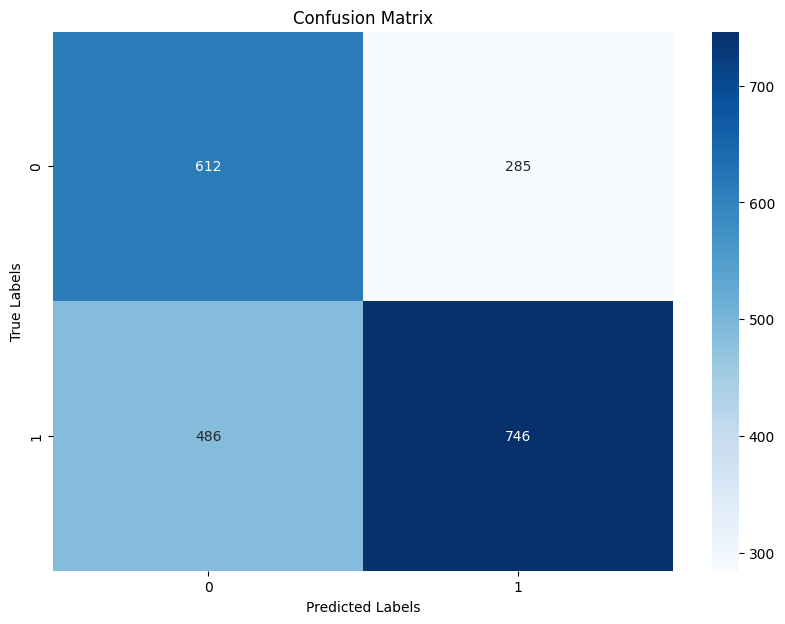

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load

# Load the dataset
data = pd.read_csv('data_train_encode.csv')

# Ensure the dataset contains the 'Late' column for labels
if 'Late' not in data.columns:
    raise ValueError("The dataset must contain the 'Late' column for labels")

# Split the dataset into features and labels
X = data.drop('Late', axis=1)
y = data['Late']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the trained model pipeline
loaded_pipeline = load("model_dt_new.joblib")

# Make predictions on the test set
predictions = loaded_pipeline.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate percentages
total_predictions = conf_matrix.sum()
correct_predictions = conf_matrix[0, 0] + conf_matrix[1, 1]
incorrect_predictions = total_predictions - correct_predictions

correct_percentage = (correct_predictions / total_predictions) * 100
incorrect_percentage = (incorrect_predictions / total_predictions) * 100

print(f"\nTotal predictions: {total_predictions}")
print(f"Correct predictions: {correct_predictions} ({correct_percentage:.2f}%)")
print(f"Incorrect predictions: {incorrect_predictions} ({incorrect_percentage:.2f}%)")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [55]:
print(new_predictions_proba)

[0.56557715]
